In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip -q install yfinance

import pandas as pd
import numpy as np
import yfinance as yf
#Potrebne biblioteke za dalje analize.

In [ ]:
from google.colab import files
uploaded = files.upload()
#Podaci su učitani u okruženje, nakon čega su dalje obrađeni.

Saving apple_news_data.csv to apple_news_data.csv


In [ ]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.shape, df.columns
#Prikaz osnovnih informacija o datasetu, broj redova, broj kolona, kao i informacija o tome koje sve kolone postoje.

((29752, 10),
 Index(['date', 'title', 'content', 'link', 'symbols', 'tags',
        'sentiment_polarity', 'sentiment_neg', 'sentiment_neu',
        'sentiment_pos'],
       dtype='object'))

In [ ]:
df.head(5)
#Prikaz prvih 5 redova, kako bismo videli sa kojim podacima radimo.

,date,title,content,link,symbols,tags,sentiment_polarity,sentiment_neg,sentiment_neu,sentiment_pos
0,2024-11-27T16:39:00+00:00,Berkshire Stock Hits Record Even as Company Re...,"Warren Buffett’s caution, his advancing age, a...",https://finance.yahoo.com/m/f5df3aa4-364b-31d6...,"0R2V.IL, AAPL.BA, AAPL.MX, AAPL.NEO, AAPL.SN, ...",NaN,0.0,0.0,1.0,0.0
1,2024-11-26T00:00:00+00:00,What Is a Stock Market Index?,What Is a Stock Market Index?,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMZN.US, MSFT.US",NaN,0.0,0.0,1.0,0.0
2,2024-11-26T00:00:00+00:00,"Could Investing $1,000 in Apple Make You a Mil...","Could Investing $1,000 in Apple Make You a Mil...",https://www.fool.com/investing/2024/11/26/coul...,AAPL.US,NaN,0.0,0.0,1.0,0.0
3,2024-11-26T00:00:00+00:00,Dow Jones Industrial Average,Dow Jones Industrial Average,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMGN.US, AMZN.US, CSCO.US, GOOG.US, G...",NaN,0.0,0.0,1.0,0.0
4,2024-11-26T00:00:00+00:00,What Is the S&P 500 Index?,What Is the S&P 500 Index?,https://www.fool.com/investing/stock-market/in...,"AAPL.US, AMZN.US, GOOG.US, GOOGL.US, META.US, ...",NaN,0.0,0.0,1.0,0.0


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df[["date"]].head()
# Konverzija kolone 'date' u datetime format radi vremenskog
# usklađivanja finansijskih vesti sa podacima o cenama akcija.

,date
0,2024-11-27 16:39:00+00:00
1,2024-11-26 00:00:00+00:00
2,2024-11-26 00:00:00+00:00
3,2024-11-26 00:00:00+00:00
4,2024-11-26 00:00:00+00:00


In [ ]:
df_aapl = df[df["symbols"].str.contains("AAPL", na=False)].copy()
df_aapl.shape
# Filtriranje vesti koje se odnose na kompaniju Apple
# na osnovu prisustva oznake "AAPL" u koloni 'symbols'.

(29735, 10)

In [ ]:
df_aapl[["date","title","symbols"]].head()

# Kolona 'symbols' sadrži berzanske oznake (tickere) kompanija
# koje se pominju u vesti, jedna vest može sadržati više oznaka.

,date,title,symbols
0,2024-11-27 16:39:00+00:00,Berkshire Stock Hits Record Even as Company Re...,"0R2V.IL, AAPL.BA, AAPL.MX, AAPL.NEO, AAPL.SN, ..."
1,2024-11-26 00:00:00+00:00,What Is a Stock Market Index?,"AAPL.US, AMZN.US, MSFT.US"
2,2024-11-26 00:00:00+00:00,"Could Investing $1,000 in Apple Make You a Mil...",AAPL.US
3,2024-11-26 00:00:00+00:00,Dow Jones Industrial Average,"AAPL.US, AMGN.US, AMZN.US, CSCO.US, GOOG.US, G..."
4,2024-11-26 00:00:00+00:00,What Is the S&P 500 Index?,"AAPL.US, AMZN.US, GOOG.US, GOOGL.US, META.US, ..."


In [ ]:
df_aapl["published_dt"] = pd.to_datetime(df_aapl["date"], utc=True).dt.tz_convert(None)
df_aapl["trade_date"] = df_aapl["published_dt"].dt.date

df_aapl[["published_dt","trade_date"]].head()

# Konverzija vremena objave vesti u datetime format bez vremenske zone
# i izdvajanje datuma trgovanja radi spajanja sa dnevnim cenama akcija.

,published_dt,trade_date
0,2024-11-27 16:39:00,2024-11-27
1,2024-11-26 00:00:00,2024-11-26
2,2024-11-26 00:00:00,2024-11-26
3,2024-11-26 00:00:00,2024-11-26
4,2024-11-26 00:00:00,2024-11-26


In [ ]:
df_aapl["published_dt"] = pd.to_datetime(df_aapl["published_dt"], errors="coerce")
df_aapl = df_aapl.dropna(subset=["published_dt"]).copy()

df_2020 = df_aapl[df_aapl["published_dt"].dt.year == 2020].copy()
df_2022 = df_aapl[df_aapl["published_dt"].dt.year == 2022].copy()
df_2024 = df_aapl[df_aapl["published_dt"].dt.year == 2024].copy()

#Napravljena tri skupa podataka u odnosu na godinu 2020,2022 i 2024.

print("2020:", df_2020.shape)
print("2022:", df_2022.shape)
print("2024:", df_2024.shape)

2020: (301, 12)
2022: (8967, 12)
2024: (5194, 12)


In [ ]:
prices = yf.download(
    "AAPL",
    start="2019-12-15",
    end="2025-01-15",
    auto_adjust=True,
    progress=False
).reset_index()


#Učitavanje cena akcija sa Yahoo finance, kako bismo uskladili
#vesti sa cenama na osnovu datuma.

In [ ]:
if isinstance(prices.columns, pd.MultiIndex):
    prices.columns = [c[0] for c in prices.columns]
#yfinance vraća kolone kao MultiIndex, i onda na osnovu ovog koda uzima
#se samo prvi nivo.

prices["trade_date"] = prices["Date"].dt.date
prices = prices.sort_values("Date")

prices_small = prices[["Date", "trade_date", "Close", "Volume"]].copy()

print("PRICES shape:", prices_small.shape)
print("PRICES columns:", prices_small.columns.tolist())
prices_small.head()

PRICES shape: (1277, 4)
PRICES columns: ['Date', 'trade_date', 'Close', 'Volume']


,Date,trade_date,Close,Volume
0,2019-12-16,2019-12-16,67.524445,128186000
1,2019-12-17,2019-12-17,67.657150,114158400
2,2019-12-18,2019-12-18,67.495476,116028400
3,2019-12-19,2019-12-19,67.563049,98369200
4,2019-12-20,2019-12-20,67.423103,275978000


In [ ]:
def attach_prices(news_df: pd.DataFrame, prices_small: pd.DataFrame) -> pd.DataFrame:
    tmp = news_df.copy()

    # merge_asof zahteva datetime i sort, jer u Yahoo finance cene moraju
    #biti sortirane i u datetime formatu.
    tmp["news_dt0"] = pd.to_datetime(tmp["trade_date"])
    tmp = tmp.sort_values("news_dt0")

    prices_sorted = prices_small.sort_values("Date").copy()

    out = pd.merge_asof(
        tmp,
        prices_sorted,
        left_on="news_dt0",
        right_on="Date",
        direction="forward"  # prvi sledeći trading dan
    )

    #Uzima se prvi sledeci trading dan i dodeljuje mu se cena.

    out = out.rename(columns={
        "Date": "trading_datetime",
        "trade_date_y": "trading_date",
        "Close": "close_t",
        "Volume": "volume_t",
        "trade_date_x": "news_date"
    })
    #Ovde se samo preimenuju kolone.

    return out


In [ ]:
df_2020_m = attach_prices(df_2020, prices_small)
df_2022_m = attach_prices(df_2022, prices_small)
df_2024_m = attach_prices(df_2024, prices_small)
#Primenjena funkcija za dodavanje cena akcija na sve godine.

df_2020_m[["published_dt", "news_date", "trading_date", "close_t"]].head()

,published_dt,news_date,trading_date,close_t
0,2020-03-23 11:40:29,2020-03-23,2020-03-23,54.264347
1,2020-03-24 13:20:27,2020-03-24,2020-03-24,59.708427
2,2020-03-27 10:43:42,2020-03-27,2020-03-27,59.916416
3,2020-03-27 04:24:19,2020-03-27,2020-03-27,59.916416
4,2020-03-30 23:02:07,2020-03-30,2020-03-30,61.626312


In [ ]:
pmap = prices_small.copy()
pmap["close_t1"] = pmap["Close"].shift(-1)
pmap["next_trade_date"] = pmap["trade_date"].shift(-1)

map_next = pmap[["trade_date", "close_t1", "next_trade_date"]].rename(
    columns={"trade_date": "trading_date"}
)

def add_next_return_and_direction(df_news: pd.DataFrame) -> pd.DataFrame:
    out = df_news.merge(map_next, on="trading_date", how="left")

    out["next_return"] = (out["close_t1"] - out["close_t"]) / out["close_t"]

    out["direction"] = np.where(out["next_return"] > 0, "UP",
                         np.where(out["next_return"] < 0, "DOWN", "NEUTRAL"))
    return out

#Funkcija u kojoj dodajemo kolone next_return i direction, next_return odnosno
#prinos računamo po formuli,ako je pozitivan prinos onda je UP, ako je negativan
#onda je DOWN

In [ ]:
df_2020_final = add_next_return_and_direction(df_2020_m)
df_2022_final = add_next_return_and_direction(df_2022_m)
df_2024_final = add_next_return_and_direction(df_2024_m)

#Primenjena funkcija na sve godine.

In [ ]:
for name, d in [("2020", df_2020_final), ("2022", df_2022_final), ("2024", df_2024_final)]:
    print("\n====", name, "====")
    print("rows:", len(d))
    print("missing close_t:", d["close_t"].isna().sum())
    print("missing close_t1:", d["close_t1"].isna().sum())
    print("direction counts:\n", d["direction"].value_counts(dropna=False))

#Provera dobijenih kolona i ukupnih suma za svaku godinu.


==== 2020 ====
rows: 301
missing close_t: 0
missing close_t1: 0
direction counts:
 direction
UP      162
DOWN    139
Name: count, dtype: int64

==== 2022 ====
rows: 8967
missing close_t: 0
missing close_t1: 0
direction counts:
 direction
DOWN       4705
UP         4234
NEUTRAL      28
Name: count, dtype: int64

==== 2024 ====
rows: 5194
missing close_t: 0
missing close_t1: 0
direction counts:
 direction
UP         2855
DOWN       2330
NEUTRAL       9
Name: count, dtype: int64


In [ ]:
df_2020_final["published_dt"] = pd.to_datetime(df_2020_final["published_dt"])
df_2020_final["month"] = df_2020_final["published_dt"].dt.to_period("M").astype(str)

df_2020_final["month"].value_counts().sort_index()
#Broj vesti po mesecima za 2020. godinu.


,count
month,
2020-03,6
2020-04,15
2020-05,17
2020-06,6
2020-07,24
2020-08,42
2020-09,45
2020-10,45
2020-11,27


In [ ]:
df_2022_final["published_dt"] = pd.to_datetime(df_2022_final["published_dt"])
df_2022_final["month"] = df_2022_final["published_dt"].dt.to_period("M").astype(str)

df_2022_final["month"].value_counts().sort_index()
#Broj vesti po mesecima za 2022. godinu.


,count
month,
2022-01,833
2022-02,722
2022-03,887
2022-04,748
2022-05,678
2022-06,807
2022-07,777
2022-08,671
2022-09,794


In [ ]:
df_2024_final["published_dt"] = pd.to_datetime(df_2024_final["published_dt"])
df_2024_final["month"] = df_2024_final["published_dt"].dt.to_period("M").astype(str)

df_2024_final["month"].value_counts().sort_index()
#Broj vesti po mesecima za 2024. godinu.


,count
month,
2024-01,783
2024-02,591
2024-03,500
2024-04,432
2024-05,541
2024-06,548
2024-07,528
2024-08,467
2024-09,411


In [ ]:
df_2020_final[["published_dt", "trading_date", "close_t", "close_t1", "next_return", "direction"]].head(10)

#Prikaz rezultata sa novim kolonama.

,published_dt,trading_date,close_t,close_t1,next_return,direction
0,2020-03-23 11:40:29,2020-03-23,54.264347,59.708427,0.100325,UP
1,2020-03-24 13:20:27,2020-03-24,59.708427,59.379505,-0.005509,DOWN
2,2020-03-27 10:43:42,2020-03-27,59.916416,61.626312,0.028538,UP
3,2020-03-27 04:24:19,2020-03-27,59.916416,61.626312,0.028538,UP
4,2020-03-30 23:02:07,2020-03-30,61.626312,61.500549,-0.002041,DOWN
5,2020-03-30 08:12:40,2020-03-30,61.626312,61.500549,-0.002041,DOWN
6,2020-04-07 02:53:24,2020-04-07,62.743660,64.349586,0.025595,UP
7,2020-04-07 03:53:56,2020-04-07,62.743660,64.349586,0.025595,UP
8,2020-04-08 08:18:23,2020-04-08,64.349586,64.813904,0.007216,UP
9,2020-04-09 14:06:33,2020-04-09,64.813904,66.086052,0.019628,UP


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

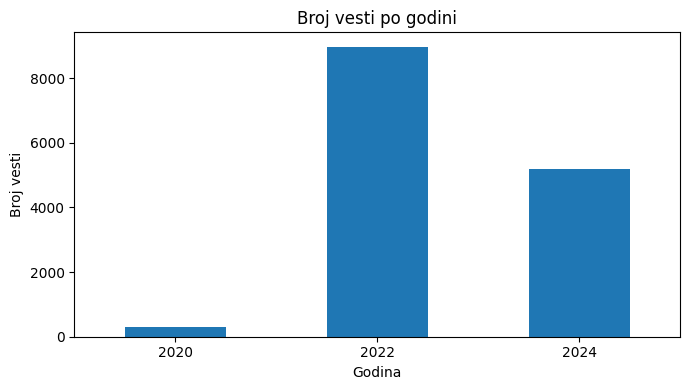

In [ ]:
news_counts = pd.Series({
    2020: len(df_2020_final),
    2022: len(df_2022_final),
    2024: len(df_2024_final)
}).sort_index()

plt.figure(figsize=(7,4))
news_counts.plot(kind="bar")
plt.title("Broj vesti po godini")
plt.xlabel("Godina")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#Na ovom grafiku možemo videti broj vesti po godini


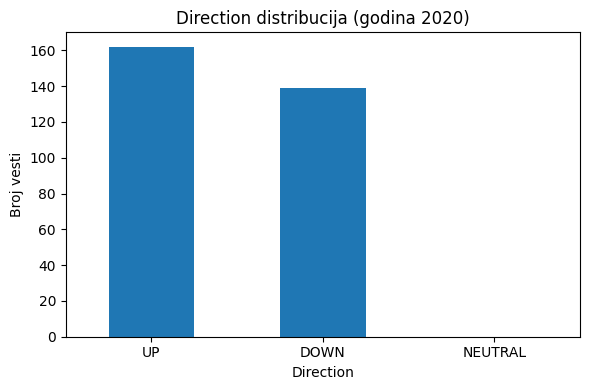

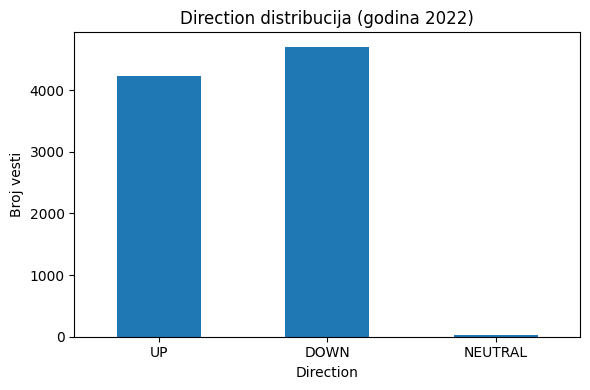

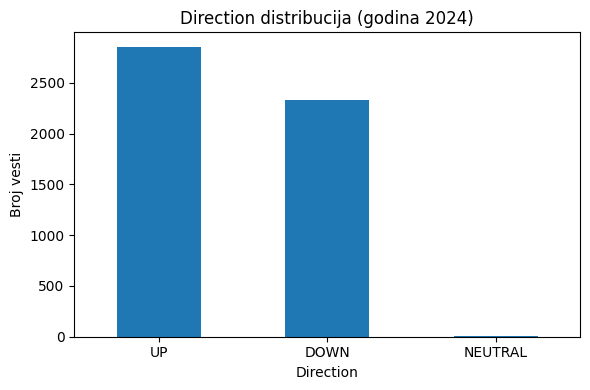

In [ ]:
def plot_direction_all(df, year):
    counts = df["direction"].value_counts().reindex(["UP","DOWN","NEUTRAL"], fill_value=0)

    plt.figure(figsize=(6,4))
    counts.plot(kind="bar")
    plt.title(f"Direction distribucija (godina {year})")
    plt.xlabel("Direction")
    plt.ylabel("Broj vesti")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_direction_all(df_2020_final, 2020)
plot_direction_all(df_2022_final, 2022)
plot_direction_all(df_2024_final, 2024)

#Nacrtana tri grafika za direction distribuciju odnosno koliko je UP,DOWN i NEUTRAL po godinama.

<Figure size 800x450 with 0 Axes>

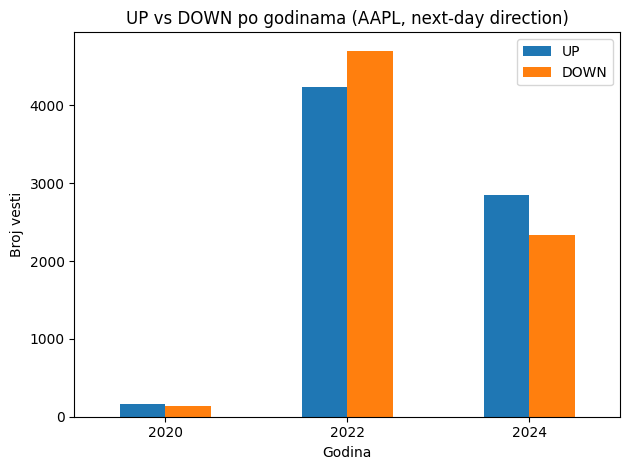

In [ ]:
years = [2020, 2022, 2024]
dfs = {2020: df_2020_final, 2022: df_2022_final, 2024: df_2024_final}

rows = []
for y in years:
    c = dfs[y][dfs[y]["direction"].isin(["UP", "DOWN"])]["direction"].value_counts()
    rows.append({
        "year": y,
        "UP": int(c.get("UP", 0)),
        "DOWN": int(c.get("DOWN", 0))
    })

counts_df = pd.DataFrame(rows).set_index("year").sort_index()

# grupisani stubići
plt.figure(figsize=(8,4.5))
counts_df.plot(kind="bar")
plt.title("UP vs DOWN po godinama (AAPL, next-day direction)")
plt.xlabel("Godina")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Na ovom grafiku možemo videti sve godine zajedno, kako bismo lakše uporedili
#razlike izmedju godina

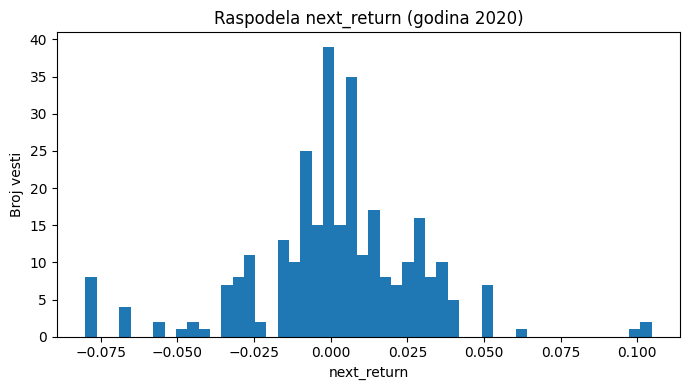

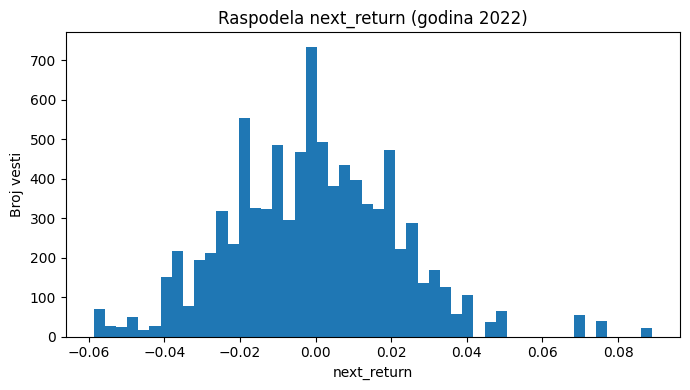

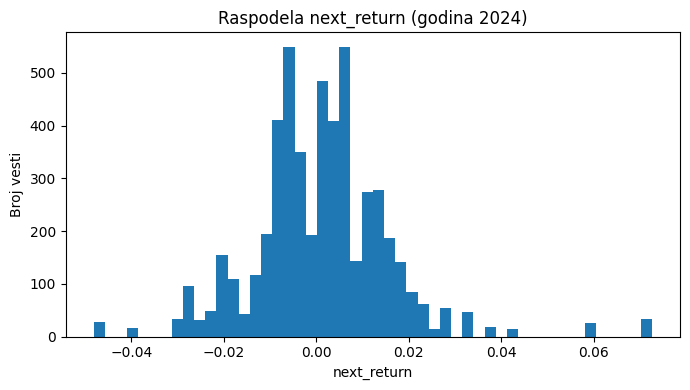

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_return_hist(df, year, bins=50):
    x = df["next_return"].replace([np.inf, -np.inf], np.nan).dropna()

    plt.figure(figsize=(7,4))
    plt.hist(x, bins=bins)
    plt.title(f"Raspodela next_return (godina {year})")
    plt.xlabel("next_return")
    plt.ylabel("Broj vesti")
    plt.tight_layout()
    plt.show()

plot_return_hist(df_2020_final, 2020)
plot_return_hist(df_2022_final, 2022)
plot_return_hist(df_2024_final, 2024)
#Tri grafika za raspodelu prinosa za svaku godinu.

In [ ]:
!pip -q install openai langchain langchain-openai pydantic

#Potrebna instalacija za rad sa LLM modelima.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")


In [ ]:
from typing import Optional
from enum import Enum
from pydantic import BaseModel, Field

class Sentiment(str, Enum):
    NEGATIVE = "negative"
    NEUTRAL = "neutral"
    POSITIVE = "positive"

class Topic(str, Enum):
    EARNINGS = "earnings"
    IPHONE = "iphone_sales_or_product"
    SERVICES = "services_subscription"
    AI = "ai_ml"
    MACRO = "macro_economy_rates_inflation"
    REGULATION = "regulation_antitrust"
    LEGAL = "legal_lawsuit"
    SUPPLY_CHAIN = "supply_chain_production"
    MERGERS = "mna_partnerships"
    OTHER = "other"

class NewsAnnotation(BaseModel):
    """Structured annotation for Apple-related financial news."""

    sentiment: Optional[Sentiment] = Field(
        default=None,
        description="Overall sentiment expressed toward Apple in the news.",
        examples=[Sentiment.NEGATIVE]
    )

    topic: Optional[Topic] = Field(
        default=None,
        description="Main topic of the news. Choose the closest single category.",
        examples=[Topic.EARNINGS]
    )
# Šema za izdvajanje sentimenta i teme finansijskih vesti u vezi sa kompanijom Apple.


In [ ]:
import pandas as pd

# primer: df_2020_final koristi dataframe
# mora da ima kolone: title, content

def combine_title_content(row, max_chars=2000):
    title = str(row.get("title", "") or "").strip()
    content = str(row.get("content", "") or "").strip()
    if len(content) > max_chars:
        content = content[:max_chars]
    if content:
        return f"TITLE: {title}\nCONTENT: {content}"
    return f"TITLE: {title}"

df_2020_final["text_for_ie"] = df_2020_final.apply(combine_title_content, axis=1)
df_2020_final[["text_for_ie"]].head(2)

#Spajanje kolona title i content, kako bi taj tekst bio ulaz u model.

,text_for_ie
0,TITLE: 3 ETFs To Short The Dow\nCONTENT: With ...
1,TITLE: Are Sporting Goods Essential in a Pande...


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

system_msg = """
You are an expert financial information extraction agent.
Determine Apple-targeted sentiment based on the impact on Apple Inc. (AAPL).

Return sentiment as EXACTLY one of:
- positive
- neutral
- negative

If Apple is mentioned but the impact is unclear, return neutral.
Return null ONLY if Apple is not mentioned at all.
Use lowercase only.
"""

prompt = ChatPromptTemplate.from_messages([
    ("system", system_msg),
    ("human", "Analyze the following Apple-related news:\n{text}")
])

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0
)

ie_chain = prompt | llm.with_structured_output(NewsAnnotation)

#Definisan prompt i llm model koji se koristi "gpt-4o-mini".


In [ ]:
from time import sleep
import pandas as pd

def tag_df_openai(
    df: pd.DataFrame,
    text_col="text_for_ie",
    sleep_sec=0.4,
    save_every=100,
    save_path=None
):
    out = df.copy()
    sentiments, topics = [], []

    for i, txt in enumerate(out[text_col], start=1):
        try:
            res = ie_chain.invoke({"text": txt})
            sentiments.append(res.sentiment.value if res.sentiment else None)
            topics.append(res.topic.value if res.topic else None)
        except Exception as e:
            sentiments.append(None)
            topics.append(None)

        if i % 50 == 0:
            print(f"Processed {i} rows")

        if save_path and i % save_every == 0:
            out.loc[:i-1, "sentiment"] = sentiments
            out.loc[:i-1, "topic"] = topics
            out.to_csv(save_path, index=False)

        sleep(sleep_sec)

    out["sentiment"] = sentiments
    out["topic"] = topics
    return out
# Funkcija za automatsku anotaciju finansijskih vesti pomoću LLM modela.
# Za svaku vest određuje Apple specifični sentiment i dominantnu temu,
# kontroliše brzinu poziva API-ja (sleep) i periodično čuva rezultate u CSV fajl.



In [ ]:
df_2020_tagged = tag_df_openai(
    df_2020_final,
    text_col="text_for_ie",
    sleep_sec=0.4,
    save_every=100,
    save_path="/content/drive/MyDrive/df_2020_tagged_openai.csv"
)
#Primena funkcije na 2020. godinu.


Processed 50 rows
Processed 100 rows
Processed 150 rows
Processed 200 rows
Processed 250 rows
Processed 300 rows


In [ ]:
df_2020_tagged["sentiment"].value_counts(dropna=False)

#Broj vesti po sentimentu

,count
sentiment,
neutral,175
negative,65
positive,61


In [ ]:
pd.crosstab(
    df_2020_tagged["sentiment"],
    df_2020_tagged["direction"],
    normalize="index"
).round(3)
#Procenti po sentimentu za UP i DOWN

direction,DOWN,UP
sentiment,,
negative,0.431,0.569
neutral,0.486,0.514
positive,0.426,0.574


<Figure size 700x400 with 0 Axes>

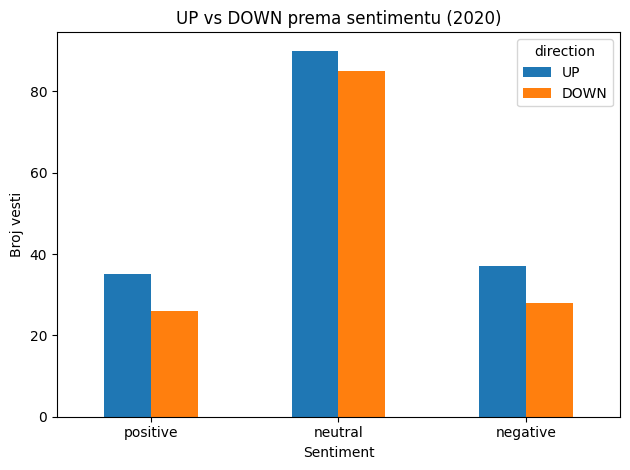

In [ ]:
df_plot = df_2020_tagged.dropna(subset=["sentiment"]).copy()
df_plot = df_plot[df_plot["direction"].isin(["UP", "DOWN"])]

ct = pd.crosstab(df_plot["sentiment"], df_plot["direction"]).reindex(
    index=["positive", "neutral", "negative"],
    columns=["UP", "DOWN"],
    fill_value=0
)

plt.figure(figsize=(7,4))
ct.plot(kind="bar")
plt.title("UP vs DOWN prema sentimentu (2020)")
plt.xlabel("Sentiment")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

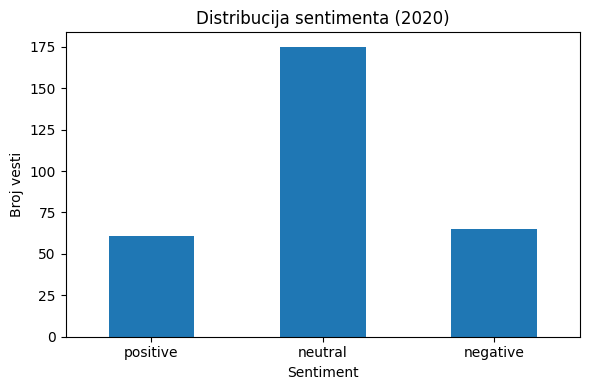

Procenti (%):
 sentiment
positive    20.3
neutral     58.1
negative    21.6
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

df_s = df_2020_tagged.dropna(subset=["sentiment"]).copy()
counts = df_s["sentiment"].value_counts().reindex(["positive","neutral","negative"], fill_value=0)

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Distribucija sentimenta (2020)")
plt.xlabel("Sentiment")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# procenti
pct = (counts / counts.sum() * 100).round(1)
print("Procenti (%):\n", pct)

/tmp/ipython-input-2907713602.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["positive","neutral","negative"])


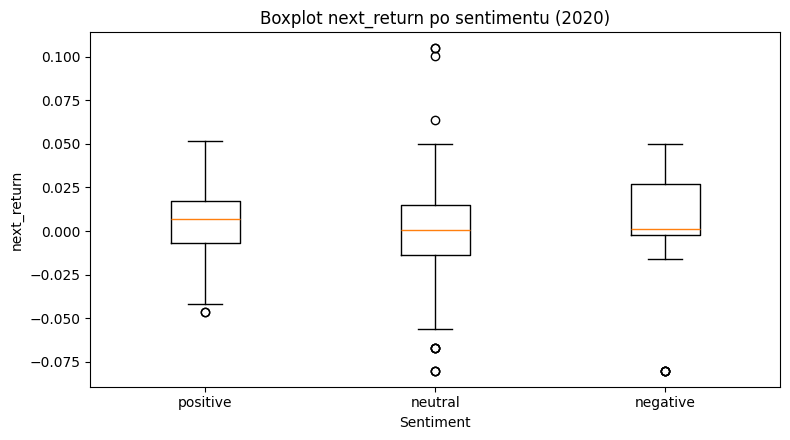

In [ ]:
import numpy as np

df_r = df_2020_tagged.dropna(subset=["sentiment","next_return"]).copy()
data = [
    df_r[df_r["sentiment"]=="positive"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values,
    df_r[df_r["sentiment"]=="neutral"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values,
    df_r[df_r["sentiment"]=="negative"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values
]

plt.figure(figsize=(8,4.5))
plt.boxplot(data, labels=["positive","neutral","negative"])
plt.title("Boxplot next_return po sentimentu (2020)")
plt.xlabel("Sentiment")
plt.ylabel("next_return")
plt.tight_layout()
plt.show()

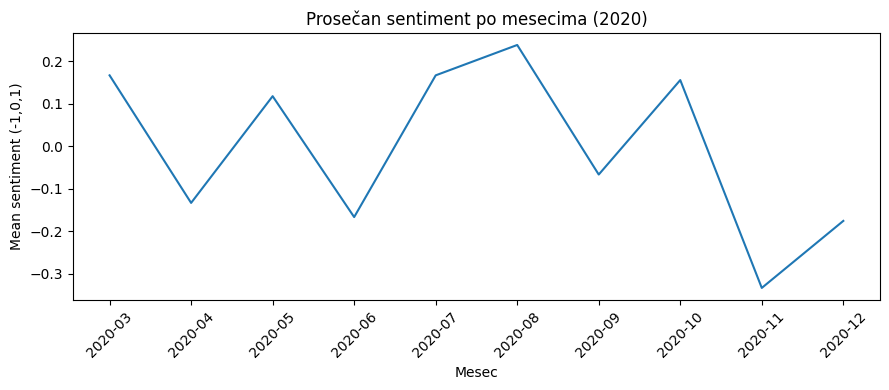

In [ ]:
sent_map = {"negative": -1, "neutral": 0, "positive": 1}

df_t = df_2020_tagged.dropna(subset=["sentiment"]).copy()
df_t["sentiment_num"] = df_t["sentiment"].map(sent_map)


df_t["trading_date"] = pd.to_datetime(df_t["trading_date"])
monthly = df_t.groupby(df_t["trading_date"].dt.to_period("M"))["sentiment_num"].mean()

plt.figure(figsize=(9,4))
monthly.index = monthly.index.astype(str)
plt.plot(monthly.index, monthly.values)
plt.title("Prosečan sentiment po mesecima (2020)")
plt.xlabel("Mesec")
plt.ylabel("Mean sentiment (-1,0,1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

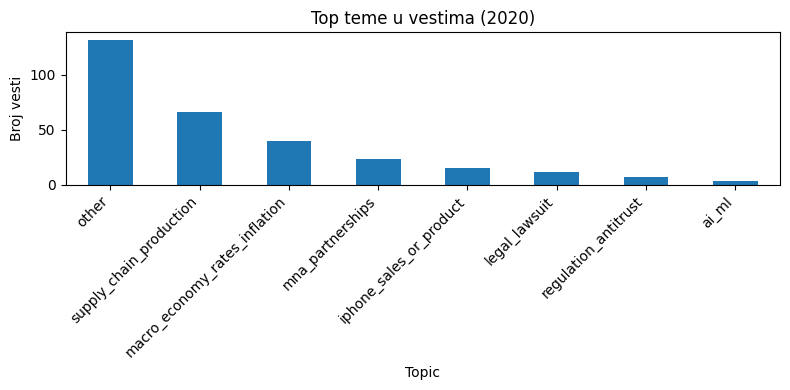

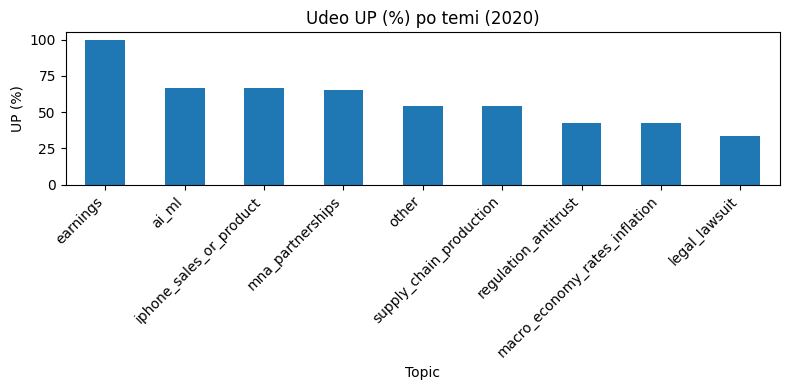

In [ ]:
df_tp = df_2020_tagged.dropna(subset=["topic","sentiment"]).copy()

top_topics = df_tp["topic"].value_counts().head(8)
plt.figure(figsize=(8,4))
top_topics.plot(kind="bar")
plt.title("Top teme u vestima (2020)")
plt.xlabel("Topic")
plt.ylabel("Broj vesti")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# UP po temi
df_tp2 = df_2020_tagged.dropna(subset=["topic"]).copy()
df_tp2 = df_tp2[df_tp2["direction"].isin(["UP","DOWN"])]

topic_up_pct = (df_tp2.groupby("topic")["direction"]
                .apply(lambda s: (s=="UP").mean()*100)
                .sort_values(ascending=False))

plt.figure(figsize=(8,4))
topic_up_pct.head(10).plot(kind="bar")
plt.title("Udeo UP (%) po temi (2020)")
plt.xlabel("Topic")
plt.ylabel("UP (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
cols = ["title", "content", "sentiment", "next_return", "direction"]

df_2020_tagged[cols].head(10)

,title,content,sentiment,next_return,direction
0,3 ETFs To Short The Dow,"With last Friday's 4.55% slide, the Dow Jones ...",neutral,0.100325,UP
1,Are Sporting Goods Essential in a Pandemic?,(Bloomberg Opinion) -- You really can’t blame ...,neutral,-0.005509,DOWN
2,Coronavirus Is Expediting iPhone Makers' Plans...,"(Bloomberg) -- Wistron Corp., one of Apple’s m...",positive,0.028538,UP
3,Olympics delay deals setback to Samsung's plan...,By Hyunjoo Jin\n\nSEOUL (Reuters) - For Samsun...,positive,0.028538,UP
4,Buying What the Fed Buys,"On Monday, March 23, the Federal Reserve annou...",neutral,-0.002041,DOWN
5,Apple supplier Foxconn's profit down 24% in la...,"TAIPEI, March 30 (Reuters) - Taiwanese electro...",negative,-0.002041,DOWN
6,Samsung’s Profit Beat Showcases a Rare Bright ...,(Bloomberg) -- Samsung Electronics Co.’s bette...,neutral,0.025594,UP
7,Samsung Will Offer Clues on How Covid-19 Is Ro...,(Bloomberg) --\n\nWhen Samsung Electronics Co....,neutral,0.025594,UP
8,Apple Partner Foxconn to Start Making Ventilat...,"(Bloomberg) -- Foxconn, the company responsibl...",positive,0.007216,UP
9,The Top 3 Ways to Trade a Pullback in Volatility,Novel coronavirus fear spiralled out of contro...,neutral,0.019628,UP


In [ ]:
df_2020_tagged[cols].tail(10)

,title,content,sentiment,next_return,direction
291,Analyst: 'Wonder Woman 1984' shows consumers e...,“Wonder Woman 1984” (T) is giving theater chai...,neutral,-0.013315,DOWN
292,"Apple Stock, CMG, PYPL Among Top Tech Stocks, ...","As Tesla, PayPal, Shopify and other tech stock...",neutral,-0.013315,DOWN
293,2020 Mergers and Acquisitions: A Year in Review,We will review some of the highlights of M&A a...,neutral,-0.013315,DOWN
294,QuantumScape Was Unknown. Now It’s One of the ...,The decade-old battery maker went public by me...,neutral,-0.013315,DOWN
295,Dow Jones Hits Record High On Trump Stimulus; ...,The Dow Jones Industrial Average rallied more ...,neutral,-0.013315,DOWN
296,"Boeing, Apple, Cisco, Novavax - Tuesday's Prem...",Stock futures traded higher Tuesday as investo...,neutral,-0.008527,DOWN
297,3 Great Dividend Stocks Whose Payouts Could Do...,"They aren't offering huge yields right now, bu...",neutral,-0.007703,DOWN
298,‘We’re envisioning a world where there’s an AI...,"Rob LoCascio, LivePerson Founder & CEO, joins ...",neutral,-0.007703,DOWN
299,Markets Close Higher on Penultimate Trading Da...,U.S. equity markets closed higher on the penul...,positive,-0.007703,DOWN
300,Markets Close Higher on Penultimate Trading Da...,U.S. equity markets closed higher on the penul...,positive,-0.007703,DOWN


In [ ]:
for s in ["positive", "negative", "neutral"]:
    sample = df_2020_tagged[df_2020_tagged["sentiment"] == s].sample(1, random_state=42)
    print(f"\n=== {s.upper()} ===\n")
    print("TITLE:", sample.iloc[0]["title"])
    print("\nCONTENT:\n", sample.iloc[0]["content"])
    print("\n" + "-"*80)
#Prikazani primeri pozitivne,negativne i neutralne vesti.



=== POSITIVE ===

TITLE: Coronavirus Is Expediting iPhone Makers' Plans to Move Beyond China

CONTENT:
 (Bloomberg) -- Wistron Corp., one of Apple’s manufacturing partners, said this week half its capacity could reside outside China within a year. The declaration underscored how the Asian assemblers that keep the world supplied with iPhones and other gadgets are shifting to a higher gear after the coronavirus showed the folly of staking everything on one country.

The move in production out of China has been underway since the trade war between Washington and Beijing reached its zenith last year. Now, Covid-19 is expediting that. Decisions by companies like Wistron and other Apple Inc. partners including Hon Hai Precision Industry Co., Inventec Corp. and Pegatron Corp., could re-shape tech supply chains.

Read more: Trump Tumult Has Gadget Giants Splitting Along U.S.-China Lines

Taipei-listed Wistron is targeting India -- where it’s already making some iPhones -- along with Vietnam a

In [ ]:
import numpy as np

def vader_label(row):
    scores = {
        "negative": row["sentiment_neg"],
        "neutral": row["sentiment_neu"],
        "positive": row["sentiment_pos"]
    }
    return max(scores, key=scores.get)
# Funkcija za dodelu konačne sentiment oznake na osnovu VADER NLP rezultata.
# Za svaku vest upoređuju se vrednosti negativnog, neutralnog i pozitivnog sentimenta,
# a kao konačna oznaka bira se ona sa najvećom verovatnoćom.

df_2020_tagged["sent_dataset"] = df_2020_tagged.apply(vader_label, axis=1)

df_2020_tagged[["sentiment_neg","sentiment_neu","sentiment_pos","sent_dataset"]].head()

,sentiment_neg,sentiment_neu,sentiment_pos,sent_dataset
0,0.020,0.869,0.111,neutral
1,0.076,0.830,0.094,neutral
2,0.016,0.921,0.062,neutral
3,0.041,0.881,0.078,neutral
4,0.057,0.846,0.098,neutral


In [ ]:
df_2020_tagged["sent_llm"] = df_2020_tagged["sentiment"].str.lower()

In [ ]:
df_cmp = df_2020_tagged.dropna(subset=["sent_dataset","sent_llm"]).copy()

df_cmp[["sent_dataset","sent_llm"]].head(10)
print("Broj vesti za poređenje:", len(df_cmp))

#Za svaku vest poredimo sentiment dobijen VADER NLP analizom i LLM modelom.

Broj vesti za poređenje: 301


In [ ]:
import pandas as pd

labels = ["negative","neutral","positive"]

cm = pd.crosstab(
    df_cmp["sent_dataset"],
    df_cmp["sent_llm"]
).reindex(index=labels, columns=labels, fill_value=0)

cm
# Kreiranje konfuzione matrice za poređenje NLP (VADER) i LLM sentimenta.
# Redovi predstavljaju sentiment dobijen NLP metodom (sent_dataset),
# dok kolone predstavljaju sentiment dobijen LLM modelom (sent_llm).
# Matrica pokazuje broj vesti za svaku kombinaciju sentiment oznaka.

sent_llm,negative,neutral,positive
sent_dataset,,,
negative,0,0,0
neutral,65,175,61
positive,0,0,0


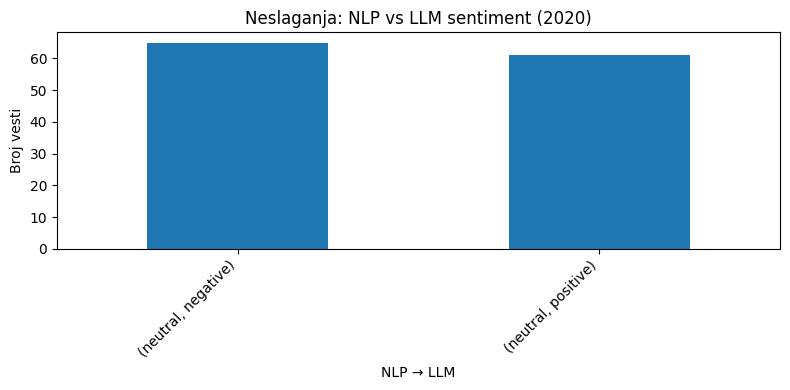

In [ ]:
import matplotlib.pyplot as plt

mismatch = df_cmp[df_cmp["sent_dataset"] != df_cmp["sent_llm"]]

pairs = (
    mismatch
    .groupby(["sent_dataset","sent_llm"])
    .size()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
pairs.plot(kind="bar")
plt.title("Neslaganja: NLP vs LLM sentiment (2020)")
plt.xlabel("NLP → LLM")
plt.ylabel("Broj vesti")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

FRAC = 0.15
RANDOM_STATE = 42


df = df_2022_final.copy()

df_2022_sample = (
    df.groupby("month", group_keys=False)
      .apply(lambda g: g.sample(n=max(1, int(round(len(g) * FRAC))),
                                random_state=RANDOM_STATE))
      .reset_index(drop=True)
)

print("Ukupno uzeto:", len(df_2022_sample))
print("Po mesecima:")
print(df_2022_sample["month"].value_counts().sort_index())

#Pravljenje dataseta za 2022. godinu za koji ćemo pustiti model,
#za svaki mesec se uzima 15% vesti i uzimaju se random vesti.
#Ispod je prikazano da ukupno analiziramo 1346 vesti i
#prikazano je po mesecima koliko vesti je uzeto.



Ukupno uzeto: 1346
Po mesecima:
month
2022-01    125
2022-02    108
2022-03    133
2022-04    112
2022-05    102
2022-06    121
2022-07    117
2022-08    101
2022-09    119
2022-10    106
2022-11    109
2022-12     93
Name: count, dtype: int64


/tmp/ipython-input-4113747502.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=max(1, int(round(len(g) * FRAC))),


In [ ]:
df_2022_sample["text_for_ie"] = df_2022_sample.apply(
    combine_title_content,
    axis=1
)
#Primenjena funkcija za spajanje naslova i sadržaja na 2022. godinu.


In [ ]:
df_2022_sample_tagged = tag_df_openai(
    df_2022_sample,
    text_col="text_for_ie",
    sleep_sec=0.2,
    save_every=100,
    save_path="/content/drive/MyDrive/df_2022_sample_tagged_openai.csv"
)
#Primena funkcije za automatsku anotaciju finansijskih vesti pomoću LLM modela
#na dataset za 2022. godinu.



Processed 50 rows
Processed 100 rows
Processed 150 rows
Processed 200 rows
Processed 250 rows
Processed 300 rows
Processed 350 rows
Processed 400 rows
Processed 450 rows
Processed 500 rows
Processed 550 rows
Processed 600 rows
Processed 650 rows
Processed 700 rows
Processed 750 rows
Processed 800 rows
Processed 850 rows
Processed 900 rows
Processed 950 rows
Processed 1000 rows
Processed 1050 rows
Processed 1100 rows
Processed 1150 rows
Processed 1200 rows
Processed 1250 rows
Processed 1300 rows


In [ ]:
df_2022_sample_tagged["sentiment"].value_counts(dropna=False)

,count
sentiment,
neutral,726
positive,342
negative,273
None,5


In [ ]:
pd.crosstab(
    df_2022_sample_tagged["sentiment"],
    df_2022_sample_tagged["direction"],
    normalize="index"
).round(3)
#Procenti po sentimentu za UP i DOWN

direction,DOWN,NEUTRAL,UP
sentiment,,,
negative,0.469,0.000,0.531
neutral,0.545,0.004,0.450
positive,0.526,0.003,0.471


<Figure size 700x400 with 0 Axes>

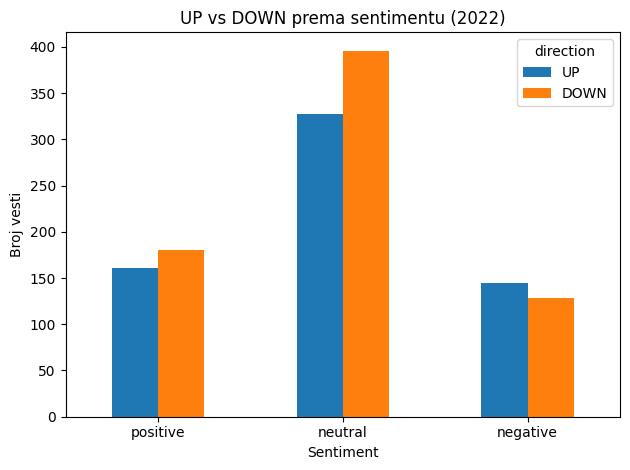

In [ ]:
df_plot = df_2022_sample_tagged.dropna(subset=["sentiment"]).copy()
df_plot = df_plot[df_plot["direction"].isin(["UP", "DOWN"])]

ct = pd.crosstab(df_plot["sentiment"], df_plot["direction"]).reindex(
    index=["positive", "neutral", "negative"],
    columns=["UP", "DOWN"],
    fill_value=0
)

plt.figure(figsize=(7,4))
ct.plot(kind="bar")
plt.title("UP vs DOWN prema sentimentu (2022)")
plt.xlabel("Sentiment")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

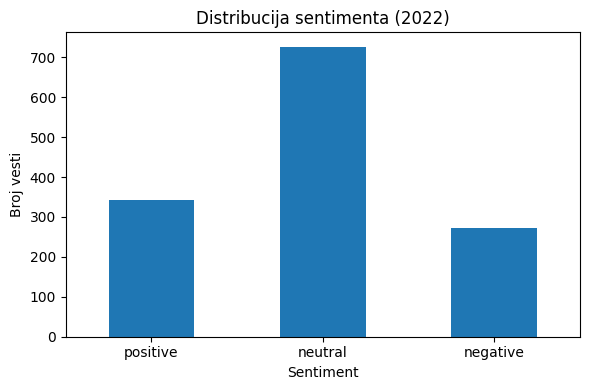

Procenti (%):
 sentiment
positive    25.5
neutral     54.1
negative    20.4
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

df_s = df_2022_sample_tagged.dropna(subset=["sentiment"]).copy()
counts = df_s["sentiment"].value_counts().reindex(["positive","neutral","negative"], fill_value=0)

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Distribucija sentimenta (2022)")
plt.xlabel("Sentiment")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# procenti
pct = (counts / counts.sum() * 100).round(1)
print("Procenti (%):\n", pct)

/tmp/ipython-input-1396968071.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["positive","neutral","negative"])


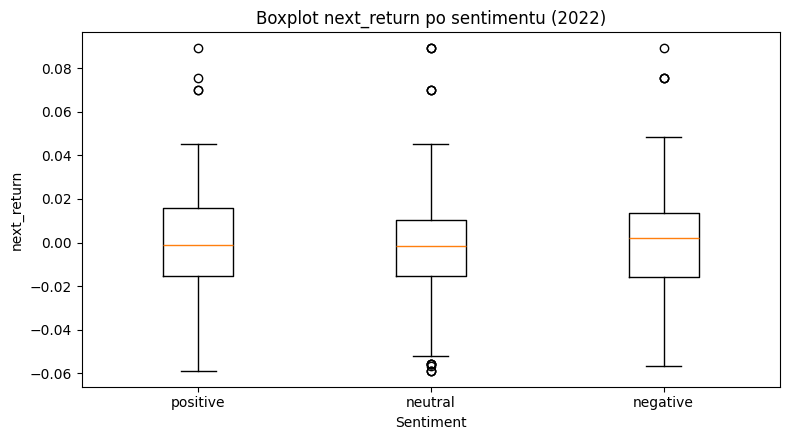

In [ ]:
import numpy as np

df_r = df_2022_sample_tagged.dropna(subset=["sentiment","next_return"]).copy()
data = [
    df_r[df_r["sentiment"]=="positive"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values,
    df_r[df_r["sentiment"]=="neutral"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values,
    df_r[df_r["sentiment"]=="negative"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values
]

plt.figure(figsize=(8,4.5))
plt.boxplot(data, labels=["positive","neutral","negative"])
plt.title("Boxplot next_return po sentimentu (2022)")
plt.xlabel("Sentiment")
plt.ylabel("next_return")
plt.tight_layout()
plt.show()

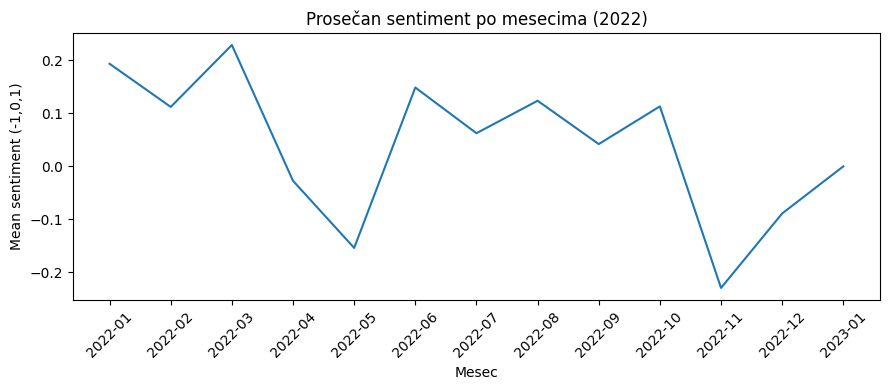

In [ ]:
sent_map = {"negative": -1, "neutral": 0, "positive": 1}

df_t = df_2022_sample_tagged.dropna(subset=["sentiment"]).copy()
df_t["sentiment_num"] = df_t["sentiment"].map(sent_map)


df_t["trading_date"] = pd.to_datetime(df_t["trading_date"])
monthly = df_t.groupby(df_t["trading_date"].dt.to_period("M"))["sentiment_num"].mean()

plt.figure(figsize=(9,4))
monthly.index = monthly.index.astype(str)
plt.plot(monthly.index, monthly.values)
plt.title("Prosečan sentiment po mesecima (2022)")
plt.xlabel("Mesec")
plt.ylabel("Mean sentiment (-1,0,1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

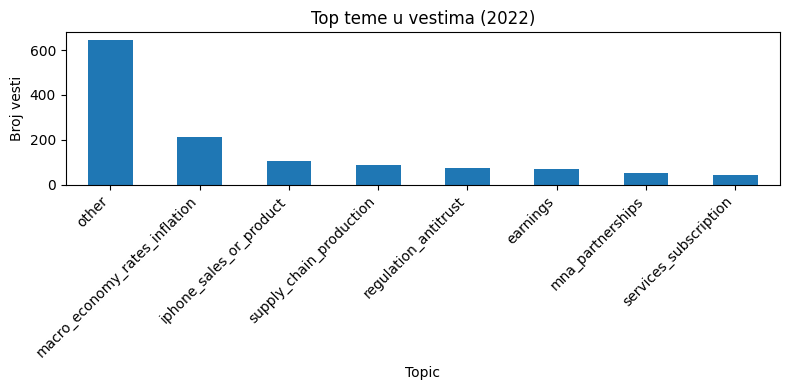

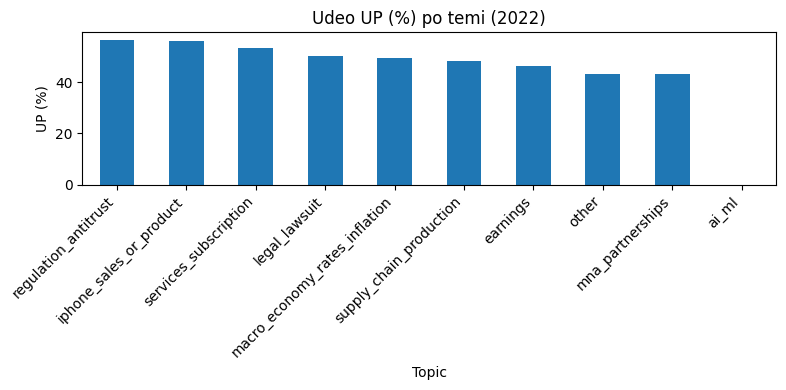

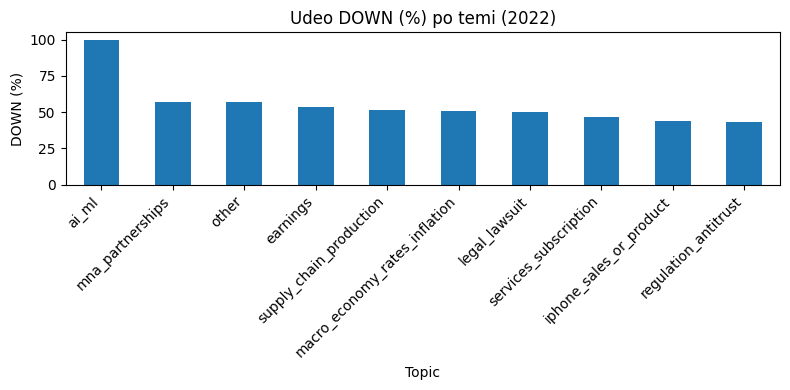

In [ ]:
df_tp = df_2022_sample_tagged.dropna(subset=["topic","sentiment"]).copy()

top_topics = df_tp["topic"].value_counts().head(8)
plt.figure(figsize=(8,4))
top_topics.plot(kind="bar")
plt.title("Top teme u vestima (2022)")
plt.xlabel("Topic")
plt.ylabel("Broj vesti")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# UP% po temi (samo za teme sa dovoljno uzoraka)
df_tp2 = df_2022_sample_tagged.dropna(subset=["topic"]).copy()
df_tp2 = df_tp2[df_tp2["direction"].isin(["UP","DOWN"])]

topic_up_pct = (df_tp2.groupby("topic")["direction"]
                .apply(lambda s: (s=="UP").mean()*100)
                .sort_values(ascending=False))

plt.figure(figsize=(8,4))
topic_up_pct.head(10).plot(kind="bar")
plt.title("Udeo UP (%) po temi (2022)")
plt.xlabel("Topic")
plt.ylabel("UP (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

df_tp2 = df_2022_sample_tagged.dropna(subset=["topic"]).copy()
df_tp2 = df_tp2[df_tp2["direction"].isin(["UP","DOWN"])]

topic_up_pct = (df_tp2.groupby("topic")["direction"]
                .apply(lambda s: (s=="DOWN").mean()*100)
                .sort_values(ascending=False))

plt.figure(figsize=(8,4))
topic_up_pct.head(10).plot(kind="bar")
plt.title("Udeo DOWN (%) po temi (2022)")
plt.xlabel("Topic")
plt.ylabel("DOWN (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
for s in ["positive", "negative", "neutral"]:
    sample = df_2022_sample_tagged[df_2022_sample_tagged["sentiment"] == s].sample(1, random_state=42)
    print(f"\n=== {s.upper()} ===\n")
    print("TITLE:", sample.iloc[0]["title"])
    print("\nCONTENT:\n", sample.iloc[0]["content"])
    print("\n" + "-"*80)
#Prikazani primeri pozitivne,negativne i neutralne vesti.



=== POSITIVE ===

TITLE: The 5 Best Features of the iPhone 14, Ranked

CONTENT:
 On Wednesday, Apple made a long-awaited announcement, introducing the new iPhone 14 series. This consists of a lineup of four different iPhone 14 models: the standard iPhone 14, the iPhone 14 Plus, the iPhone 14 Pro, and the iPhone 14 Pro Max. Both the iPhone 14 and the 14 Plus will come with A15 Bionic chips just as the iPhone 13 did.

--------------------------------------------------------------------------------

=== NEGATIVE ===

TITLE: The Zacks Analyst Blog Highlights Apple, Microsoft and Intel

CONTENT:
 For Immediate Release

Chicago, IL – March 8, 2022 – Zacks.com announces the list of stocks featured in the Analyst Blog. Every day the Zacks Equity Research analysts discuss the latest news and events impacting stocks and the financial markets. Stocks recently featured in the blog include: Apple AAPL, Microsoft MSFT and Intel INTC.

Here are highlights from Monday’s Analyst Blog:

More Big Tech C

In [ ]:
import numpy as np

def vader_label(row):
    scores = {
        "negative": row["sentiment_neg"],
        "neutral": row["sentiment_neu"],
        "positive": row["sentiment_pos"]
    }
    return max(scores, key=scores.get)
# Funkcija za dodelu konačne sentiment oznake na osnovu VADER NLP rezultata.
# Za svaku vest upoređuju se vrednosti negativnog, neutralnog i pozitivnog sentimenta,
# a kao konačna oznaka bira se ona sa najvećom verovatnoćom.

df_2022_sample_tagged["sent_dataset"] = df_2022_sample_tagged.apply(vader_label, axis=1)

df_2022_sample_tagged[["sentiment_neg","sentiment_neu","sentiment_pos","sent_dataset"]].head()

,sentiment_neg,sentiment_neu,sentiment_pos,sent_dataset
0,0.102,0.860,0.039,neutral
1,0.101,0.899,0.000,neutral
2,0.029,0.858,0.113,neutral
3,0.000,0.870,0.130,neutral
4,0.155,0.775,0.070,neutral


In [ ]:
df_2022_sample_tagged["sent_llm"] = df_2022_sample_tagged["sentiment"].str.lower()

In [ ]:
df_cmp = df_2022_sample_tagged.dropna(subset=["sent_dataset","sent_llm"]).copy()

df_cmp[["sent_dataset","sent_llm"]].head(10)
print("Broj vesti za poređenje:", len(df_cmp))

#Za svaku vest poredimo sentiment dobijen VADER NLP analizom i LLM modelom.

Broj vesti za poređenje: 1341


In [ ]:
import pandas as pd

labels = ["negative","neutral","positive"]

cm = pd.crosstab(
    df_cmp["sent_dataset"],
    df_cmp["sent_llm"]
).reindex(index=labels, columns=labels, fill_value=0)

cm
# Kreiranje konfuzione matrice za poređenje NLP (VADER) i LLM sentimenta.
# Redovi predstavljaju sentiment dobijen NLP metodom (sent_dataset),
# dok kolone predstavljaju sentiment dobijen LLM modelom (sent_llm).
# Matrica pokazuje broj vesti za svaku kombinaciju sentiment oznaka.

sent_llm,negative,neutral,positive
sent_dataset,,,
negative,1,1,0
neutral,272,725,342
positive,0,0,0


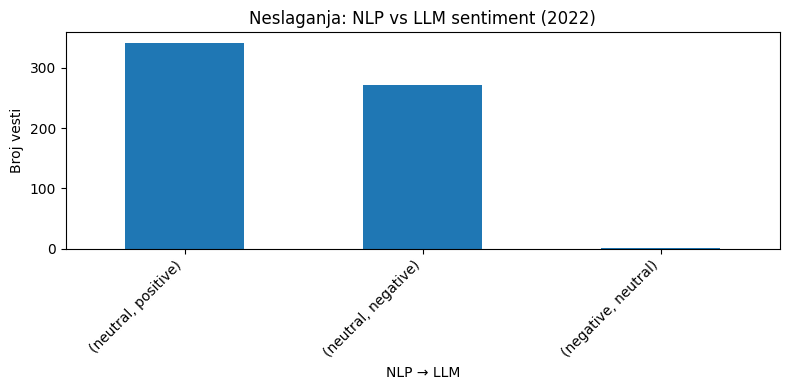

In [ ]:
import matplotlib.pyplot as plt

mismatch = df_cmp[df_cmp["sent_dataset"] != df_cmp["sent_llm"]]

pairs = (
    mismatch
    .groupby(["sent_dataset","sent_llm"])
    .size()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
pairs.plot(kind="bar")
plt.title("Neslaganja: NLP vs LLM sentiment (2022)")
plt.xlabel("NLP → LLM")
plt.ylabel("Broj vesti")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
RANDOM_STATE = 42
SAMPLE_FRAC = 0.15

df_2024_sample = (
    df_2024_final
    .groupby("month", group_keys=False)
    .apply(lambda x: x.sample(
        frac=SAMPLE_FRAC,
        random_state=RANDOM_STATE
    ) if len(x) > 1 else x)
    .reset_index(drop=True)
)
#Uzorak za 2024. godinu, uzima se isto 15% vesti po mesecu i uzimaju
#se random vesti, ako mesec ima samo jednu vest ona se zadržava.


/tmp/ipython-input-3248536733.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(


In [ ]:
pd.DataFrame({
    "original": df_2024_final["month"].value_counts().sort_index(),
    "sample_15pct": df_2024_sample["month"].value_counts().sort_index()
})

#Provera broja vesti po mesecu i uzetog uzorka odnosno 15%.


,original,sample_15pct
month,,
2024-01,783,117
2024-02,591,89
2024-03,500,75
2024-04,432,65
2024-05,541,81
2024-06,548,82
2024-07,528,79
2024-08,467,70
2024-09,411,62


In [ ]:
df_2024_sample["text_for_ie"] = df_2024_sample.apply(
    combine_title_content,
    axis=1
)
#Primena funkcije za spajanje naslova i sadržaja za 2024. godinu.


In [ ]:
df_2024_sample_tagged = tag_df_openai(
    df_2024_sample,
    text_col="text_for_ie",
    sleep_sec=0.2,
    save_every=100,
    save_path="/content/drive/MyDrive/df_2024_sample_tagged_openai.csv"
)
#Primena funkcije za automatsku anotaciju finansijskih vesti pomoću LLM modela
#na dataset za 2024. godinu.


Processed 50 rows
Processed 100 rows
Processed 150 rows
Processed 200 rows
Processed 250 rows
Processed 300 rows
Processed 350 rows
Processed 400 rows
Processed 450 rows
Processed 500 rows
Processed 550 rows
Processed 600 rows
Processed 650 rows
Processed 700 rows
Processed 750 rows


In [ ]:
df_2024_sample_tagged["sentiment"].value_counts(dropna=False)

,count
sentiment,
neutral,352
positive,220
negative,197
None,10


In [ ]:
pd.crosstab(
    df_2024_sample_tagged["sentiment"],
    df_2024_sample_tagged["direction"],
    normalize="index"
).round(3)
#Procenti po sentimentu za UP i DOWN

direction,DOWN,NEUTRAL,UP
sentiment,,,
negative,0.528,0.000,0.472
neutral,0.438,0.006,0.557
positive,0.468,0.000,0.532


<Figure size 700x400 with 0 Axes>

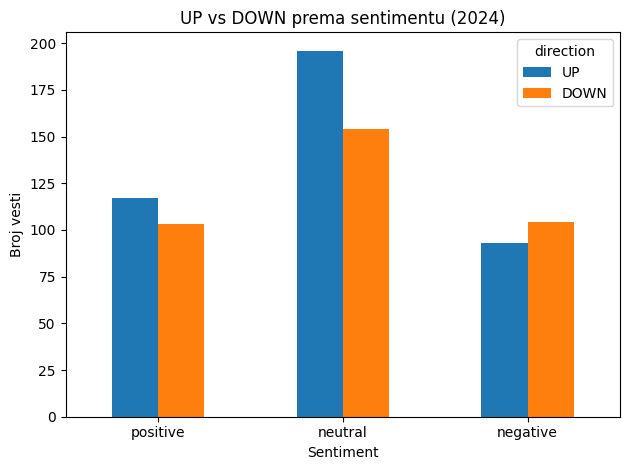

In [ ]:
df_plot = df_2024_sample_tagged.dropna(subset=["sentiment"]).copy()
df_plot = df_plot[df_plot["direction"].isin(["UP", "DOWN"])]

ct = pd.crosstab(df_plot["sentiment"], df_plot["direction"]).reindex(
    index=["positive", "neutral", "negative"],
    columns=["UP", "DOWN"],
    fill_value=0
)

plt.figure(figsize=(7,4))
ct.plot(kind="bar")
plt.title("UP vs DOWN prema sentimentu (2024)")
plt.xlabel("Sentiment")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

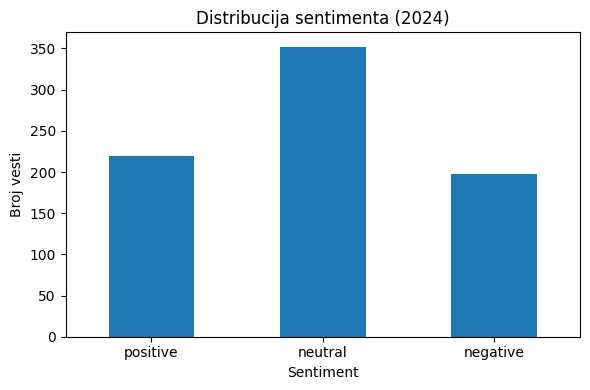

Procenti (%):
 sentiment
positive    28.6
neutral     45.8
negative    25.6
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

df_s = df_2024_sample_tagged.dropna(subset=["sentiment"]).copy()
counts = df_s["sentiment"].value_counts().reindex(["positive","neutral","negative"], fill_value=0)

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Distribucija sentimenta (2024)")
plt.xlabel("Sentiment")
plt.ylabel("Broj vesti")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# procenti
pct = (counts / counts.sum() * 100).round(1)
print("Procenti (%):\n", pct)

/tmp/ipython-input-4259848437.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["positive","neutral","negative"])


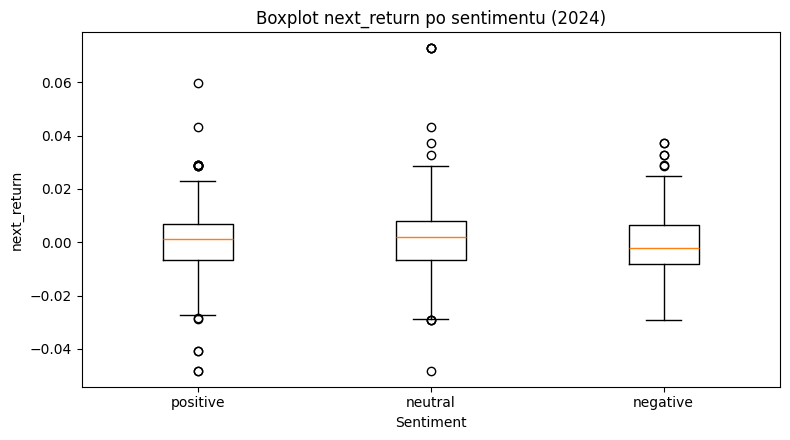

In [ ]:
import numpy as np

df_r = df_2024_sample_tagged.dropna(subset=["sentiment","next_return"]).copy()
data = [
    df_r[df_r["sentiment"]=="positive"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values,
    df_r[df_r["sentiment"]=="neutral"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values,
    df_r[df_r["sentiment"]=="negative"]["next_return"].replace([np.inf,-np.inf], np.nan).dropna().values
]

plt.figure(figsize=(8,4.5))
plt.boxplot(data, labels=["positive","neutral","negative"])
plt.title("Boxplot next_return po sentimentu (2024)")
plt.xlabel("Sentiment")
plt.ylabel("next_return")
plt.tight_layout()
plt.show()

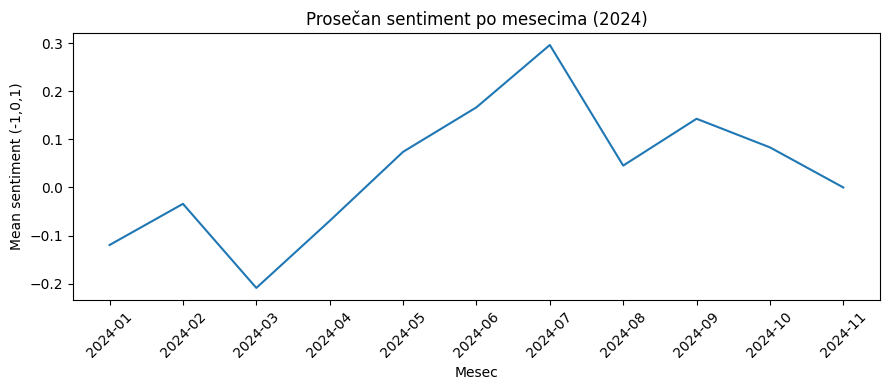

In [ ]:
sent_map = {"negative": -1, "neutral": 0, "positive": 1}

df_t = df_2024_sample_tagged.dropna(subset=["sentiment"]).copy()
df_t["sentiment_num"] = df_t["sentiment"].map(sent_map)


df_t["trading_date"] = pd.to_datetime(df_t["trading_date"])
monthly = df_t.groupby(df_t["trading_date"].dt.to_period("M"))["sentiment_num"].mean()

plt.figure(figsize=(9,4))
monthly.index = monthly.index.astype(str)
plt.plot(monthly.index, monthly.values)
plt.title("Prosečan sentiment po mesecima (2024)")
plt.xlabel("Mesec")
plt.ylabel("Mean sentiment (-1,0,1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

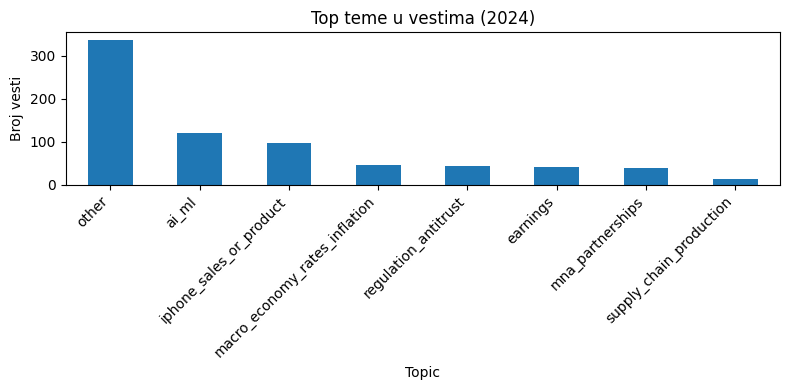

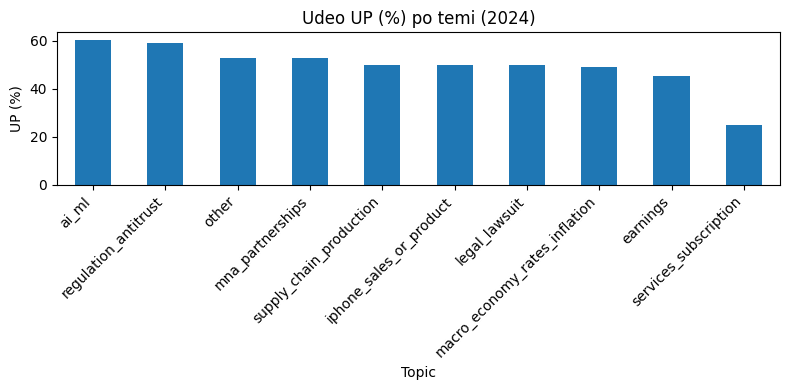

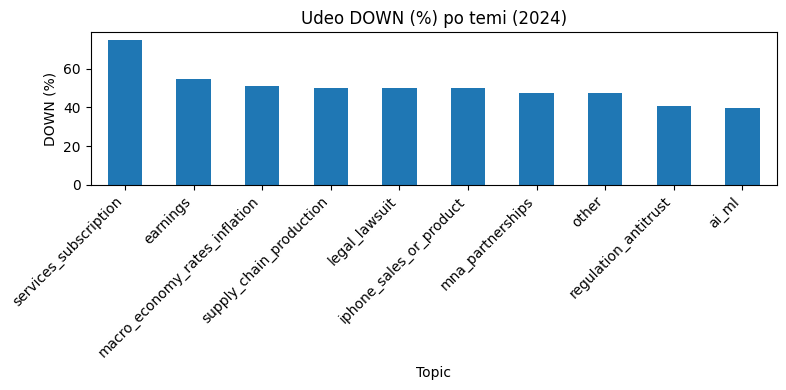

In [ ]:
df_tp = df_2024_sample_tagged.dropna(subset=["topic","sentiment"]).copy()

top_topics = df_tp["topic"].value_counts().head(8)
plt.figure(figsize=(8,4))
top_topics.plot(kind="bar")
plt.title("Top teme u vestima (2024)")
plt.xlabel("Topic")
plt.ylabel("Broj vesti")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# UP% po temi
df_tp2 = df_2024_sample_tagged.dropna(subset=["topic"]).copy()
df_tp2 = df_tp2[df_tp2["direction"].isin(["UP","DOWN"])]

topic_up_pct = (df_tp2.groupby("topic")["direction"]
                .apply(lambda s: (s=="UP").mean()*100)
                .sort_values(ascending=False))

plt.figure(figsize=(8,4))
topic_up_pct.head(10).plot(kind="bar")
plt.title("Udeo UP (%) po temi (2024)")
plt.xlabel("Topic")
plt.ylabel("UP (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

df_tp2 = df_2024_sample_tagged.dropna(subset=["topic"]).copy()
df_tp2 = df_tp2[df_tp2["direction"].isin(["UP","DOWN"])]

topic_up_pct = (df_tp2.groupby("topic")["direction"]
                .apply(lambda s: (s=="DOWN").mean()*100)
                .sort_values(ascending=False))

plt.figure(figsize=(8,4))
topic_up_pct.head(10).plot(kind="bar")
plt.title("Udeo DOWN (%) po temi (2024)")
plt.xlabel("Topic")
plt.ylabel("DOWN (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

path_2020 = "/content/drive/MyDrive/df_2020_tagged_openai.csv"
df_2020_tagged = pd.read_csv(path_2020)

#Učitavanje podataka iz 2020 godine.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mapiranje sentiment kategorija u numerički skor
SENT_SCORE = {"negative": -1, "neutral": 0, "positive": 1}

def prep_df(df, year_label):
    out = df.copy()

    if "published_dt" in out.columns:
        out["published_dt"] = pd.to_datetime(out["published_dt"], errors="coerce")
    elif "date" in out.columns:
        out["published_dt"] = pd.to_datetime(out["date"], errors="coerce")


    if "month" not in out.columns or out["month"].isna().all():
        out["month"] = out["published_dt"].dt.to_period("M")


    out["sent_score"] = out["sentiment"].map(SENT_SCORE)

    out["year"] = year_label
    return out

# Funkcija za standardizaciju dataset-a: obrada datuma, meseca,
# numeričko kodiranje sentimenta i dodavanje oznake godine.


In [ ]:
df20 = prep_df(df_2020_tagged, 2020)
df22 = prep_df(df_2022_sample_tagged, 2022)
df24 = prep_df(df_2024_sample_tagged, 2024)

#Primena funkcije na sve godine.


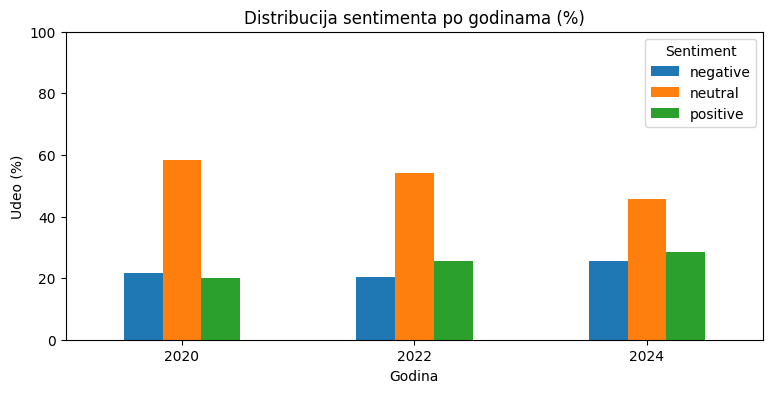

sentiment,negative,neutral,positive
year,,,
2020,21.666667,58.333333,20.000000
2022,20.357942,54.138702,25.503356
2024,25.617685,45.773732,28.608583


In [ ]:
def plot_sentiment_share(dfs, labels=("negative","neutral","positive")):
    # tabela: year x sentiment -> %
    all_df = pd.concat(dfs, ignore_index=True)
    tab = (pd.crosstab(all_df["year"], all_df["sentiment"], normalize="index") * 100)
    tab = tab.reindex(columns=list(labels))

    ax = tab.plot(kind="bar", figsize=(9,4))
    plt.title("Distribucija sentimenta po godinama (%)")
    plt.ylabel("Udeo (%)")
    plt.xlabel("Godina")
    plt.xticks(rotation=0)
    plt.legend(title="Sentiment")
    plt.ylim(0, 100)
    plt.show()
    return tab

sent_share = plot_sentiment_share([df20, df22, df24])
sent_share


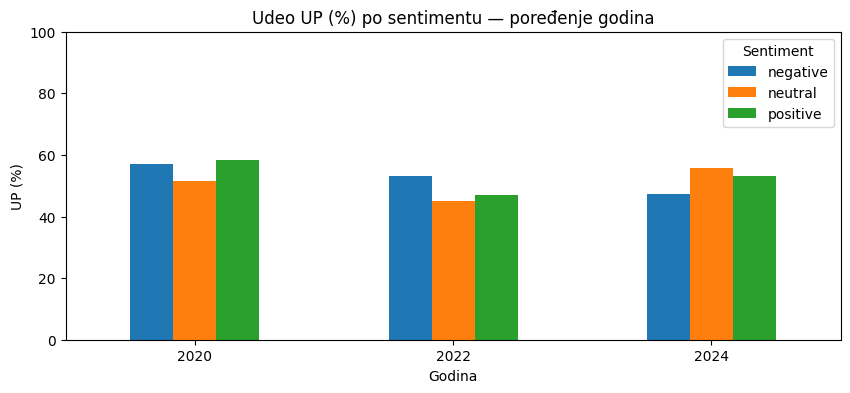

sentiment,negative,neutral,positive
year,,,
2020,56.923077,51.428571,58.333333
2022,53.113553,45.041322,47.076023
2024,47.208122,55.681818,53.181818


In [ ]:
def plot_up_share_by_sentiment(dfs, labels=("negative","neutral","positive")):
    all_df = pd.concat(dfs, ignore_index=True)


    tmp = all_df.dropna(subset=["sentiment","direction"]).copy()
    up_pct = (tmp["direction"].eq("UP")
              .groupby([tmp["year"], tmp["sentiment"]])
              .mean()
              .mul(100)
              .unstack("sentiment")
              .reindex(columns=list(labels)))

    ax = up_pct.plot(kind="bar", figsize=(10,4))
    plt.title("Udeo UP (%) po sentimentu — poređenje godina")
    plt.ylabel("UP (%)")
    plt.xlabel("Godina")
    plt.xticks(rotation=0)
    plt.ylim(0, 100)
    plt.legend(title="Sentiment")
    plt.show()
    return up_pct

up_by_sent = plot_up_share_by_sentiment([df20, df22, df24])
up_by_sent


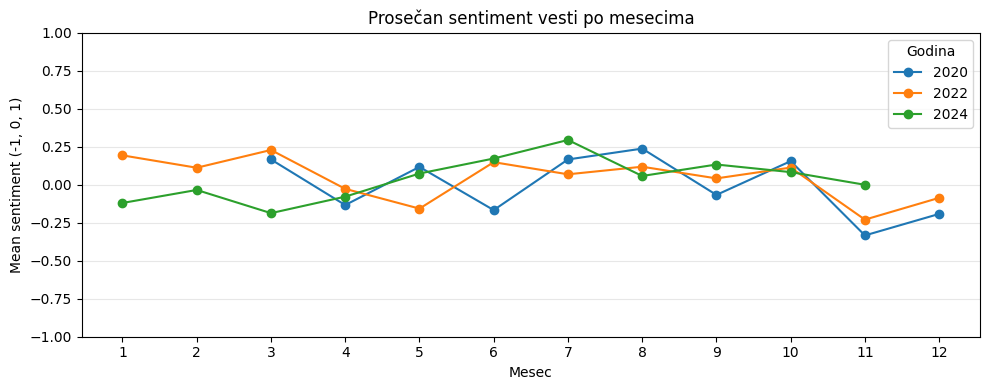

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_monthly_sentiment_three_lines(df20, df22, df24):
    def monthly_mean(df):
        tmp = df.dropna(subset=["month", "sent_score"]).copy()

        if not pd.api.types.is_integer_dtype(tmp["month"]):
            tmp["month_num"] = tmp["month"].astype(str).str[-2:].astype(int)
        else:
            tmp["month_num"] = tmp["month"]
        return (
            tmp.groupby("month_num")["sent_score"]
               .mean()
               .reindex(range(1, 13))
        )

    m20 = monthly_mean(df20)
    m22 = monthly_mean(df22)
    m24 = monthly_mean(df24)

    plt.figure(figsize=(10,4))
    plt.plot(m20.index, m20.values, marker="o", label="2020", color="#1f77b4")
    plt.plot(m22.index, m22.values, marker="o", label="2022", color="#ff7f0e")
    plt.plot(m24.index, m24.values, marker="o", label="2024", color="#2ca02c")

    plt.title("Prosečan sentiment vesti po mesecima")
    plt.xlabel("Mesec")
    plt.ylabel("Mean sentiment (-1, 0, 1)")
    plt.xticks(range(1, 13))
    plt.ylim(-1, 1)
    plt.grid(True, axis="y", alpha=0.3)
    plt.legend(title="Godina")
    plt.tight_layout()
    plt.show()

plot_monthly_sentiment_three_lines(df20, df22, df24)


